In [9]:
%load_ext autoreload
%autoreload 2
import kkcalc as kk
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
filename = './Gd_beta_piet.dat'
input_data = np.loadtxt(filename)

In [3]:
Output = kk.kk_calculate_real(filename, 'GdFe', input_data_type='beta', fix_distortions=True, curve_tolerance=0.05)

In [4]:
Stoichiometry = kk.data.ParseChemicalFormula('GdFe')
print(Stoichiometry)

[[64, 1.0], [26, 1.0]]


In [5]:
Relativistic_Correction = kk.calc_relativistic_correction(Stoichiometry)
print(Relativistic_Correction)

89.38737639455924


In [13]:
ASF_E, ASF_Data = kk.data.calculate_asf(Stoichiometry)
ASF_Data3 = kk.data.coeffs_to_linear(ASF_E, ASF_Data, 0.1)
ASF_Data2 = kk.data.coeffs_to_ASF(ASF_E, np.vstack((ASF_Data, ASF_Data[-1])))

In [14]:
#Test_E = np.linspace(41257.87,41259.87,num=21)
#Real_Spectrum2 = kk.KK_PP(Test_E, Output[:,0], Im, Relativistic_Correction)

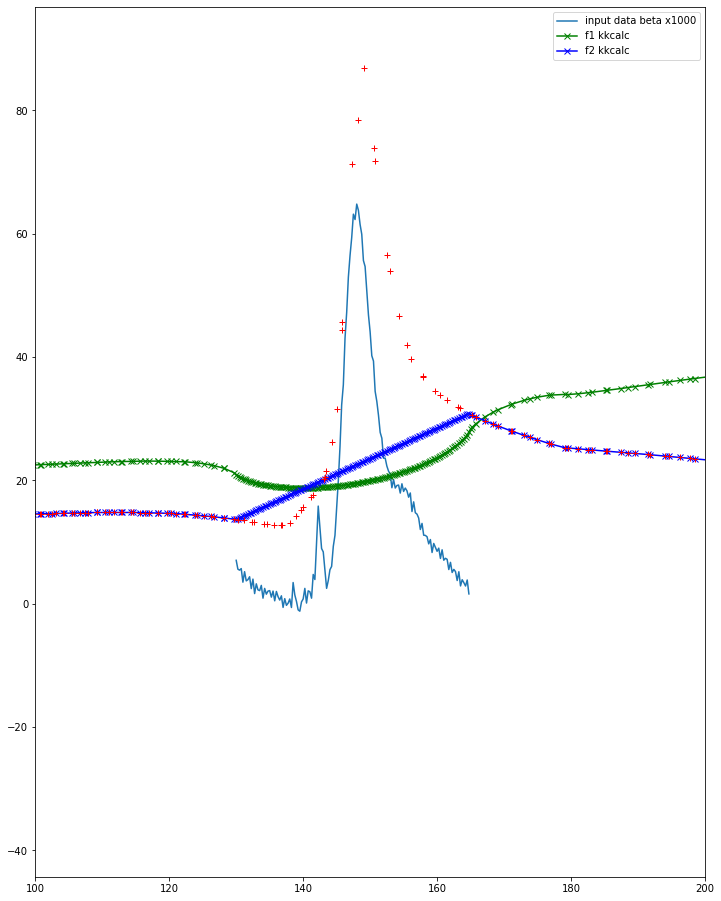

In [34]:
plt.figure(None, (12, 16))

plt.plot(input_data[:, 0], input_data[:, 1]*1000, label='input data beta x1000')

plt.plot(Output[:,0],Output[:,1],'xg-', label='f1 kkcalc')
plt.plot(Output[:,0],Output[:,2],'xb-', label='f2 kkcalc')

plt.plot(ASF_E,ASF_Data2,'+r')

#plt.plot(ASF_E,ASF_Data22,'xr')
#plt.plot(ASF_Data3[0],ASF_Data3[1],'r-')
#plt.plot(Test_E,Real_Spectrum2,'*y')
#plt.xscale('log')
plt.xlim(100, 200)
plt.legend()
plt.show()

In [22]:
print(Output)

[[1.00000000e+01 2.94022359e+00 3.97738000e+00]
 [1.01152000e+01 2.83495543e+00 4.05448807e+00]
 [1.01617000e+01 3.23331463e+00 4.08579227e+00]
 ...
 [2.00000075e+05 8.96781475e+01 3.47869713e-01]
 [3.00000050e+05 8.95731585e+01 1.72667862e-01]
 [5.00000000e+05 8.94559988e+01 7.68563368e-02]]


In [3]:
kk.data.ParseChemicalFormula('Fe')

[[26, 1.0]]

# Try from GUI

In [48]:
ChemicalFormula = 'GdFe'
Stoichiometry = kk.data.ParseChemicalFormula(ChemicalFormula)
Relativistic_Correction = kk.calc_relativistic_correction(Stoichiometry)
ASF_E, ASF_Data = kk.data.calculate_asf(Stoichiometry)

In [43]:
raw_file = kk.data.load_data(filename)
NearEdgeData = kk.data.convert_data(raw_file, 'Beta', 'ASF')

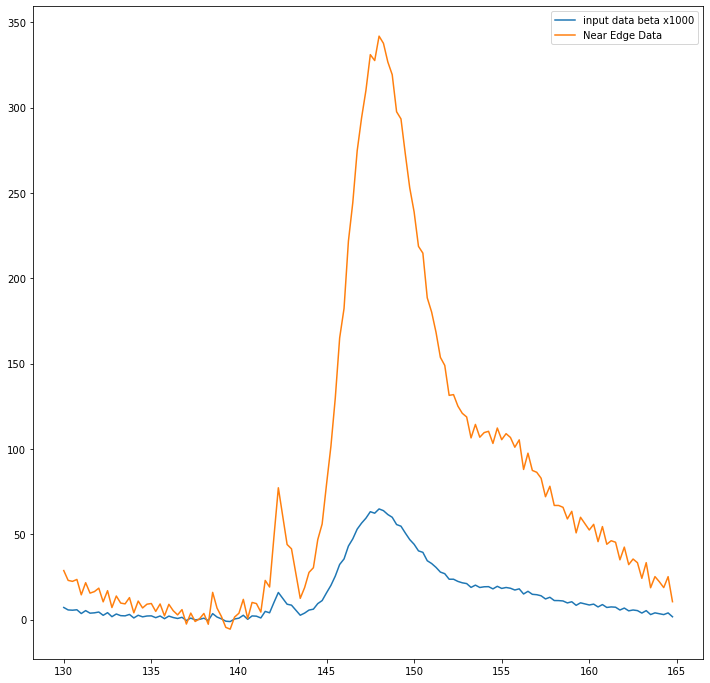

In [47]:
plt.figure(None, (12, 12))

plt.plot(input_data[:, 0], input_data[:, 1]*1000, label='input data beta x1000')
plt.plot(NearEdgeData[:, 0], NearEdgeData[:, 1], label='Near Edge Data')
plt.legend()
plt.show()

## combine data

In [75]:
Data_Type = 'Beta'

if raw_file is not None:
    print("Convert to scattering factors")
    NearEdgeData = kk.data.convert_data(raw_file, Data_Type, 'ASF')
print("Combine Data")
# Get splice points
splice_eV = np.array([10.0, 30000.0])  # Henke limits
# limits
splice_eV[0] = 140 #NearEdgeData[0, 0]
splice_eV[1] = 200 #NearEdgeData[-1, 0]
Full_E, Imaginary_Spectrum, NearEdgeData, splice_ind = kk.data.merge_spectra(
    NearEdgeData, ASF_E, ASF_Data, merge_points=splice_eV, add_background=0, fix_distortions=0, plotting_extras=True)


Convert to scattering factors
Combine Data


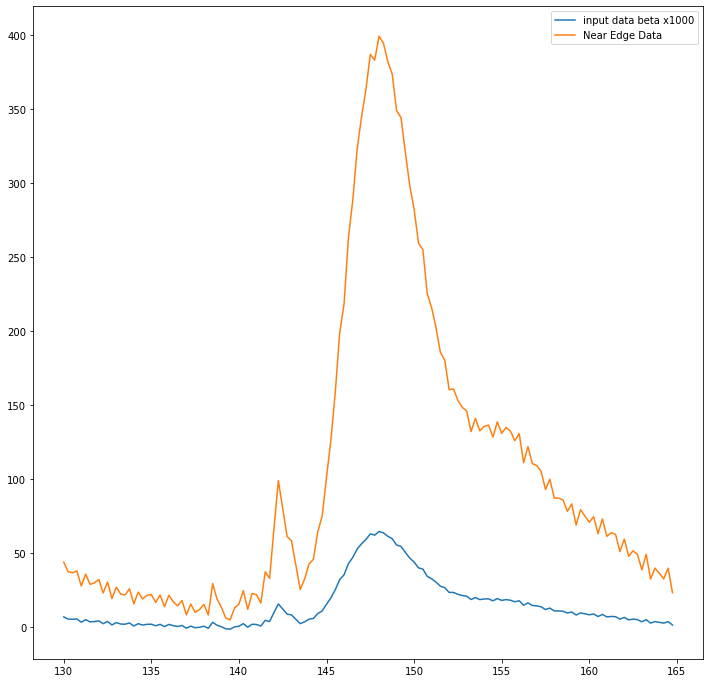

In [76]:
plt.figure(None, (12, 12))

plt.plot(input_data[:, 0], input_data[:, 1]*1000, label='input data beta x1000')
plt.plot(NearEdgeData[:, 0], NearEdgeData[:, 1], label='Near Edge Data')
plt.legend()
plt.show()

## calculate

In [77]:
if Imaginary_Spectrum is not None:
    KK_Real_Spectrum = kk.KK_PP(Full_E, Full_E, Imaginary_Spectrum, Relativistic_Correction)

## plot data

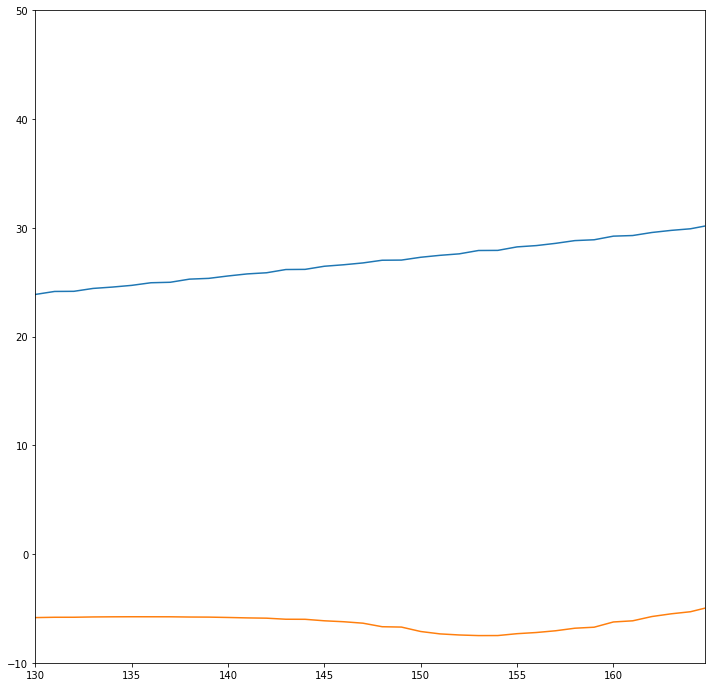

In [84]:
plt.figure(None, (12, 12))

# # List of things to plot
# plotlist = []
# get initial guess at X limits
X_min = 0
X_max = 30000
Y_max = 1
Y_min = 0
if NearEdgeData is not None:
    X_min = NearEdgeData[0, 0]
    X_max = NearEdgeData[-1, 0]
# if self.SpliceText1.GetValue() != "Start":
#     X_min = float(self.SpliceText1.GetValue())
# if self.SpliceText2.GetValue() != "End":
#     X_max = float(self.SpliceText2.GetValue())
# if Imaginary_Spectrum is not None:
#     if Stoichiometry is not None:
#         scale = sum([Z*count for Z, count in Stoichiometry])
#     else:
#         scale = 1.
#     Im_energies, Im_values = kk.data.coeffs_to_linear(Full_E, Imaginary_Spectrum, 0.001*scale)
#     #plotlist.append(plt.plot.PolyLine(list(zip(Im_energies,Im_values)), colour='black', width=1))
#     plt.plot(list(zip(Im_energies,Im_values)))

#     # get Y limits
#     if splice_ind is None:
#         Y_max = max(Im_values)
#         Y_min = min(Im_values)
#     else:
#         Y_max = max(Im_values[splice_ind[0]:splice_ind[1]])
#         Y_min = min(Im_values[splice_ind[0]:splice_ind[1]])
# if NearEdgeData is not None:
#     Y_max = max(NearEdgeData[:,1])
#     Y_min = min(NearEdgeData[:,1])
# #     plotlist.append(plt.plot.PolyMarker(list(zip(NearEdgeData[:,0], NearEdgeData[:,1])), colour='blue', marker='plus', size=1))
#     plt.plot(list(zip(NearEdgeData[:,0], NearEdgeData[:,1])))

# if splice_ind is not None:
#     splice_values = kk.data.coeffs_to_ASF(Full_E[splice_ind], Imaginary_Spectrum[[splice_ind[0],min(splice_ind[1],Imaginary_Spectrum.shape[0]-1)]])
# #     plotlist.append(plt.plot.PolyMarker(list(zip(Full_E[splice_ind], splice_values)), colour='red', marker='cross', size=1))
#     plt.plot(list(zip(Full_E[splice_ind], splice_values)))


if KK_Real_Spectrum is not None:
    if splice_ind is None:
        Y_max = max(self.KK_Real_Spectrum)
        Y_min = min(self.KK_Real_Spectrum)
    else:
        Y_max = max(Y_max, max(KK_Real_Spectrum[splice_ind[0]:splice_ind[1]]))
        Y_min = min(Y_min, min(KK_Real_Spectrum[splice_ind[0]:splice_ind[1]]))
#     plotlist.append(plt.plot.PolyLine(list(zip(Full_E, KK_Real_Spectrum)), colour='green', width=1))
    plt.plot(list(zip(Full_E, KK_Real_Spectrum)))

# # Expand plotting limits for prettiness
# window_width = X_max-X_min
# X_max = X_max+window_width*0.1
# X_min = max(X_min-window_width*0.1, 0)
# window_Im_height = Y_max-Y_min
# window_Re_height = Y_max-Y_min
# Y_max = Y_max+window_Im_height*0.1
# Y_min = Y_min-window_Im_height*0.1
# Y_max = Y_max+window_Re_height*0.1
# Y_min = Y_min-window_Re_height*0.1
# # set up text, axis and draw
# #print plotlist
# #print X_min, X_max, Y_min, Y_max
# self.PlotAxes.Draw(plot.PlotGraphics(plotlist, '', 'Energy (eV)', 'Magnitude'), xAxis=(X_min, X_max), yAxis=(0, Y_max))
# #print "Plotlist =", len(plotlist)

plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)
plt.ylim(-10, 50)

plt.show()